# ANÁLISIS EXPLORATORIO Y VISUALIZACIÓN DE DATOS.

### Importando las librerías a utilizar.

In [2]:
import pandas as pd 
import numpy as np
import missingno as msno 

### Cargando los datasets

In [70]:
df_movie  = pd.read_csv("Data/movies_dataset.csv", index_col= False, sep=",", header= 0)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3120\619154225.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie  = pd.read_csv("Data/movies_dataset.csv", index_col= False, sep=",", header= 0)


### Desanidando los datos.

In [71]:
import ast

def desanidar(obj): 
    if isinstance(obj, str) and "{" in obj:
        Nombres=[]
        for elemento in ast.literal_eval(obj):
            Nombres.append(elemento["name"]);
        return Nombres
    
def desanidar_2(obj): 
    
    if isinstance(obj, str) and "{" in obj:
        dic = ast.literal_eval(obj)
        return dic["name"]
    
# Aplicando a las columnas anidadas.

df_movie["genres"]                = df_movie["genres"].apply(desanidar)
df_movie["belongs_to_collection"] = df_movie["belongs_to_collection"].apply(desanidar_2)
df_movie["production_companies"]  = df_movie["production_companies"].apply(desanidar)
df_movie["production_countries"]  = df_movie["production_countries"].apply(desanidar)
df_movie["spoken_languages"]      = df_movie["spoken_languages"].apply(desanidar)

### Analizamos el Dataframe 

In [73]:
# Mostrando los primeros datos.
df_movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,False,None,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,None,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [80]:
# Analizamos la información de sus datos.
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 43024 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   33585 non-null  object 
 13  production_countries   39178 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [75]:
# Calculamos el número de celdas vacías en cada colummna.
datos_faltantes = df_movie.isnull().sum().to_frame()
datos_faltantes = datos_faltantes.rename(columns= {0: " Celdas Vacías"})
datos_faltantes

,Celdas Vacías
adult,0
belongs_to_collection,40975
budget,0
genres,2442
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


<AxesSubplot: >

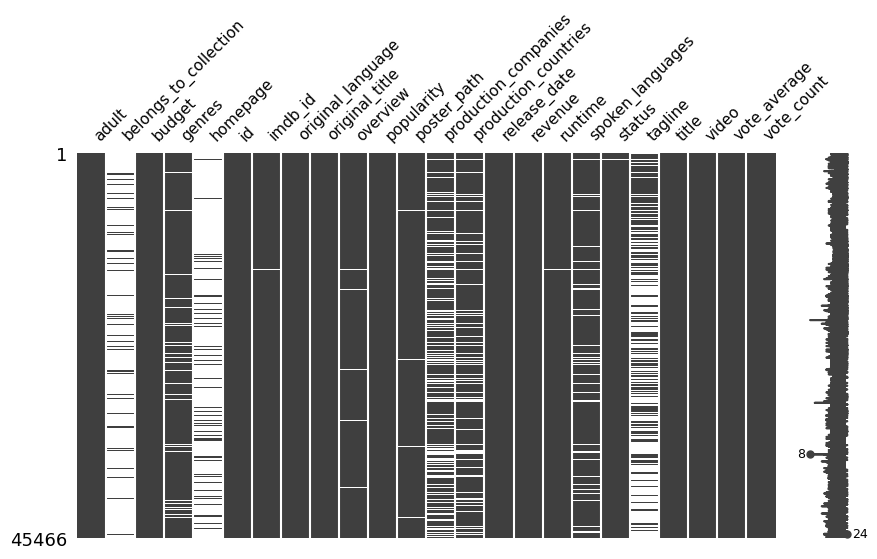

In [76]:
# Visualizamos el "gráfico matriz" y observamos algún posible patrón entre los datos faltantes.
msno.matrix(df_movie, figsize=(10,5), fontsize=11)

In [77]:
# Vemos la correlacion de las variables
df_movie.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3120\632333252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_movie.corr()


,revenue,runtime,vote_average,vote_count
revenue,1.000000,0.103917,0.083868,0.812022
runtime,0.103917,1.000000,0.158146,0.113539
vote_average,0.083868,0.158146,1.000000,0.123607
vote_count,0.812022,0.113539,0.123607,1.000000


In [78]:
# Mostrando la forma del Dataframe Amazon, cantidad de filas y columnas.
print(df_movie.shape)

(45466, 24)


### Conclusiones
El dataset cuenta con una distribución de 45466 filas y 24 columnas.
- Los campos con datos faltante son:

    + belongs_to_collection :  40975
    + homepage              :  37684
    + tagline               :  25054
    + production_companies  :  11881
    + production_countries  :  6288 
    + spoken_languages      :  3835
    + genres                :  2442
    + overview              :  954
    + poster_path           :  386
    + runtime               :  263
    + release_date          :  87
    + status                :  87
    + imdb_id               :  17
    + original_language     :  11
    + revenue	            :  6
    + title	                :  6
    + video	                :  6
    + vote_average	        :  6
    + vote_count		    :  6
    + popularity		    :  5
- Tenemos 24 variables, de las cuáles:

    + float64  : 4
    + object : 20

- Recomendaciones:
    + Dropear o rellenar los valores faltantes.
    + Tener en cuenta la alta correlación de las variables: revenue y vote_count.